<a href="https://colab.research.google.com/github/Sandanu87/Nextgen-Analytics-/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas
import pandas as pd
# load dataset
model = pd.read_csv('/content/cleaned_data.csv')
model.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0,7257.60
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1.0,8657.32
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0,12925.44
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0,13114.36
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0,13659.03


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(sparse_output=False)
encoded_data = encode.fit_transform(model[['outlet_city']])

encoded_df = pd.DataFrame(encoded_data, columns=encode.get_feature_names_out(['outlet_city']))
data = pd.concat([model, encoded_df], axis=1)
data = data.drop('outlet_city', axis=1)

In [ ]:
x = data.drop('cluster_catgeory',axis=1)
y = data['cluster_catgeory']

In [ ]:
print(x.shape)
print(y.shape)

(774146, 25)
(774146,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Or another strategy like 'mean' or 'median'
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape to 2D for imputer
y = pd.Series(y_imputed.flatten(), index=y.index)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (541902, 25)
x_test (232244, 25)


In [ ]:
from sklearn.preprocessing import RobustScaler

numeric_features = ['dry_sales', 'luxury_sales', 'fresh_sales', 'total_sales']

x_train_log = np.log1p(x_train[numeric_features])
x_test_log = np.log1p(x_test[numeric_features])

scaler = RobustScaler()

scaled_x_train = scaler.fit_transform(x_train_log)
scaled_x_test = scaler.transform(x_test_log)

x_train_scaled = pd.DataFrame(scaled_x_train, columns=numeric_features, index=x_train.index)
x_test_scaled = pd.DataFrame(scaled_x_test, columns=numeric_features, index=x_test.index)

x_train_final = pd.concat([x_train.drop(columns=numeric_features), x_train_scaled], axis=1)
x_test_final = pd.concat([x_test.drop(columns=numeric_features), x_test_scaled], axis=1)

In [ ]:
print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (541902, 25)
x_test (232244, 25)


In [ ]:
#logistic regression model
data = LogisticRegression()
data.fit(x_train_final, y_train)

LogisticRegression()

In [ ]:
y_pred = data.predict(x_test_final)
y_pred

array([2., 2., 2., ..., 4., 6., 1.])

In [ ]:
Comparison_df = pd.DataFrame({'Actual' : y_test,
'Predicted' : y_pred})
Comparison_df.to_csv(r'/content/cleaned_data.csv', index=True)
Comparison_df

,Actual,Predicted
325438,2.0,2.0
256814,2.0,2.0
256952,2.0,2.0
353046,5.0,5.0
620966,6.0,2.0
...,...,...
369599,1.0,1.0
212939,2.0,2.0
154228,4.0,4.0
645126,6.0,6.0


In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [ ]:
pd.set_option('display.max_rows',774146)
pd.set_option('display.max_columns',25)
pd.set_option('display.width',None)

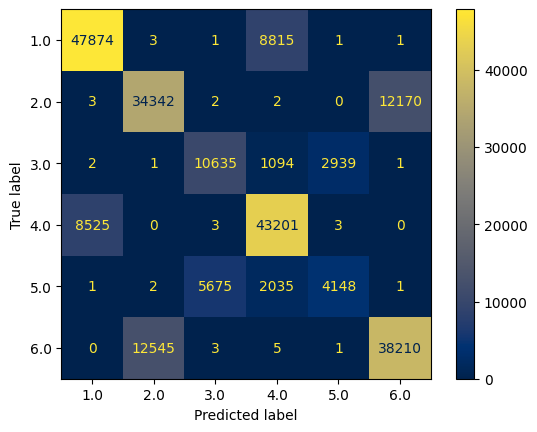

In [ ]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, y_pred, labels=data.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=data.classes_)
disp.plot(cmap='cividis')

In [ ]:
# Import the function to calculate accuracy score
from sklearn.metrics import accuracy_score
# Apply the function to find the correct predictions
accuracy = accuracy_score(y_test,y_pred)
# Display the accuracy
print ('The Logistic Regression Model Accuracy:',accuracy)

The Logistic Regression Model Accuracy: 0.7682006854859544


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.85      0.84      0.85     56695
         2.0       0.73      0.74      0.74     46519
         3.0       0.65      0.72      0.69     14672
         4.0       0.78      0.84      0.81     51732
         5.0       0.58      0.35      0.44     11862
         6.0       0.76      0.75      0.76     50764

    accuracy                           0.77    232244
   macro avg       0.73      0.71      0.71    232244
weighted avg       0.77      0.77      0.76    232244



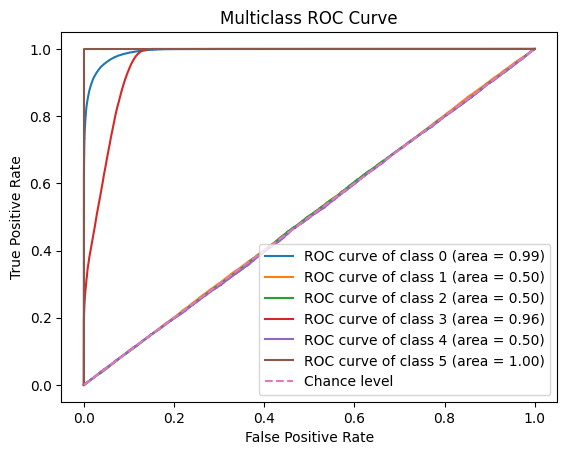

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Assuming x_train_final, y_train, x_test_final, y_test are already defined

y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_train_bin.shape[1]

classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(x_train_final, y_train_bin).decision_function(x_test_final)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"ROC curve of class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance level")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.show()